<a href="https://colab.research.google.com/github/r-dube/CICIDS/blob/main/ids_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the top modules that are used in multiple places
import numpy as np
import pandas as pd

In [ ]:
# Some global variables to drive the script
# data_url is the location of the data
# Data is not loaded from a local file
# Data is loaded from a prepocessed dataset
data_url="https://raw.githubusercontent.com/r-dube/CICIDS/main/MachineLearningCVE/processed/small-cicids2017.csv"

In [ ]:
# label names (YY) in the data and their
# mapping to numerical values
label_map = {
 'BENIGN' : 0,
 'FTP-Patator' : 1,
 'SSH-Patator' : 2,
 'DoS slowloris' : 3,
 'DoS Slowhttptest': 4,
 'DoS Hulk' : 5,
 'DoS GoldenEye' : 6,
 'Heartbleed' : 7,
 'Web Attack � Brute Force' : 8,
 'Web Attack � XSS' : 8,
 'Web Attack � Sql Injection' : 8,
 'Infiltration' : 9,
 'Bot' : 10,
 'PortScan' : 11,
 'DDoS' : 12,
}

num_ids_features = 76
num_ids_classes = 13
ids_classes = [ 'BENIGN', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed', 'Brute Force', 'XSS', 'Sql Injection', 'Infiltration', 'Bot', 'PortScan', 'DDoS',]

In [ ]:
# Utility functions used by GMM

def ids_load_df_from_csv():
    """
    Load dataframe from csv file
    Input:
        None
    Returns:
        None
    """

    df = pd.read_csv(data_url)

    # uncomment print statements for debugging if data does not load
    # print ("load Dataframe shape", df.shape)

    return df

def ids_pca_array(df):
    """
    Return numpy arrays from dataframe
    Input:
        Dataframe that has columns of covariates followed by a column of labels
    Returns:
        X, y as numpy arrays
    """
    numcols = len(df.columns)
    print("df.shape", df.shape)

    X = df.iloc[:, 0:numcols-1]
    y = df.loc[:, 'YY']

    X = X.values
    y = y.values

    print ("X.shape", X.shape, "y.shape", y.shape)

    return X, y

In [ ]:
# Use PCA to visualize data
from sklearn.decomposition import PCA

df = ids_load_df_from_csv ()
X, y = ids_pca_array(df)
pca = PCA(n_components=6)
X2 = pca.fit_transform(X)
print ("X2.shape", X2.shape, "y.shape", y.shape)


df.shape (39616, 77)
X.shape (39616, 76) y.shape (39616,)
X2.shape (39616, 6) y.shape (39616,)


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

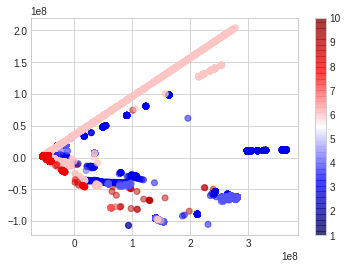

In [ ]:
plt.scatter(X2[:, 0], X2[:, 1], c=y, alpha=0.5, cmap='seismic')
plt.colorbar();

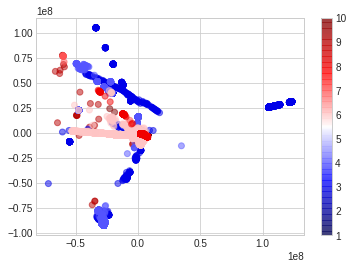

In [ ]:
plt.scatter(X2[:, 2], X2[:, 3], c=y, alpha=0.5, cmap='seismic')
plt.colorbar();

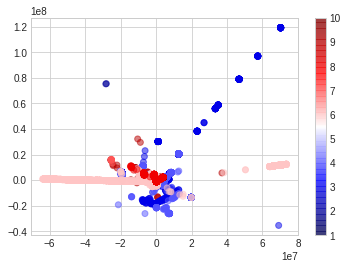

In [ ]:
plt.scatter(X2[:, 4], X2[:, 5], c=y, alpha=0.5, cmap='seismic')
plt.colorbar();